In [669]:
%run __init__.py

In [4]:
cd ..

/home/jovyan/dsi


In [15]:
# load 1990 - 2016 data made by Troy Harper
data = pd.read_csv('Capstone/Data/mlb-game-data-1990-2016.csv')

In [16]:
#check to see where NaNs are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63862 entries, 0 to 63861
Data columns (total 25 columns):
date               63862 non-null object
box                63862 non-null object
team               63862 non-null object
at                 0 non-null float64
opponent           63862 non-null object
w_or_l             63862 non-null object
runs               63862 non-null int64
runs_allowed       63862 non-null int64
innings            5752 non-null float64
record             63862 non-null object
div_rank           63862 non-null int64
gb                 63862 non-null object
winning_pitcher    63849 non-null object
losing_pitcher     63849 non-null object
save               32469 non-null object
time               63861 non-null object
d_or_n             63861 non-null object
attendance         63380 non-null object
streak             63861 non-null object
double_header      63862 non-null int64
runs_pg            63862 non-null float64
runs_ma            61870 non-null fl

In [17]:
#drop the unneeded columns
data.drop(['at', 'winning_pitcher', 'losing_pitcher','save','ten_game','box'],axis=1,inplace=True)

In [18]:
data['attendance'].isnull().values.any()

True

In [19]:
#Data has many NaNs with double header taking place 
print (data[(data["attendance"].isnull()) &  (data["double_header"] == 1)].shape)
print (data[(data["attendance"].isnull()) &  (data["double_header"] == 0)].shape)
print (data[(data["attendance"].notnull()) & (data["double_header"] == 1)].shape)

(478, 19)
(4, 19)
(1048, 19)


In [20]:
#Filling NaNs in the double_header games by using different data set. 
nan_dh_df = data[(data["attendance"].isnull()) & (data["double_header"] == 1)].sort_values('date')

In [21]:
#most double header games only included attendance in the first game
for x in list(nan_dh_df.index):
    data['attendance'][x] = data.iloc[x + 1]['attendance']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
#double check if any double headers are missing values
data[(data["attendance"].isnull()) & (data["double_header"] == 1)].sort_values('date')

,date,team,opponent,w_or_l,runs,runs_allowed,innings,record,div_rank,gb,time,d_or_n,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,opening_day


In [27]:

data[(data["attendance"].isnull()) & (data["double_header"] == 0)]

,date,team,opponent,w_or_l,runs,runs_allowed,innings,record,div_rank,gb,time,d_or_n,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,opening_day
6338,2015-04-29,BAL,CHW,W,8,2,NaN,9-10,4,2.0,2:03,D,NaN,++,0,5.473684,7.2,5.8,0
11256,2015-09-05,CHC,ARI,W,2,0,NaN,76-57,3,9.5,2:34,D,NaN,+,0,4.180451,6.2,5.8,0
19740,1990-05-27,DET,CHW,L,1,2,NaN,20-25,5,4.5,2:55,D,NaN,-,0,4.644444,4.2,4.8,0
37750,1991-06-12,NYM,ATL,L &V;,1,6,NaN,30-25,2,5.5,NaN,NaN,NaN,+,0,4.254545,3.2,2.8,0


In [47]:
data_2015 = pd.read_csv('Capstone/Data/GL2015.TXT',header=None )

In [77]:
data_2015[data_2015[0] == 20150429][17]

304        NaN
305    34220.0
306    10284.0
307    19447.0
308    30055.0
309    16212.0
310    26037.0
311    19633.0
312    12595.0
313    30634.0
314    23012.0
315    53285.0
316    17076.0
317    21824.0
318    40399.0
Name: 17, dtype: float64

In [81]:
data_2015[data_2015[0] == 20150905][17]

2010    39889.0
2011    36534.0
2012    28949.0
2013    27643.0
2014    37827.0
2015    35030.0
2016    27387.0
2017    46373.0
2018        NaN
2019    28632.0
2020    29842.0
2021    37672.0
2022    23135.0
2023    43536.0
2024    45139.0
2025    28646.0
Name: 17, dtype: float64

In [90]:
no_nan_att_data = data[data['attendance'].notnull()]

In [91]:
no_nan_att_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63858 entries, 0 to 63861
Data columns (total 19 columns):
date               63858 non-null object
team               63858 non-null object
opponent           63858 non-null object
w_or_l             63858 non-null object
runs               63858 non-null int64
runs_allowed       63858 non-null int64
innings            5752 non-null float64
record             63858 non-null object
div_rank           63858 non-null int64
gb                 63858 non-null object
time               63858 non-null object
d_or_n             63858 non-null object
attendance         63858 non-null object
streak             63857 non-null object
double_header      63858 non-null int64
runs_pg            63858 non-null float64
runs_ma            61866 non-null float64
runs_allowed_ma    63858 non-null float64
opening_day        63858 non-null int64
dtypes: float64(4), int64(5), object(10)
memory usage: 9.7+ MB


In [92]:
no_nan_att_data.innings.unique()

array([ nan,  11.,  12.,  13.,  10.,  14.,  17.,  15.,  16.,   7.,   6.,
         8.,   5.,  19.,   9.,  18.,  20.,  22.])

In [93]:
no_nan_att_data['innings'].fillna(9.0,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [94]:
no_nan_att_data[no_nan_att_data['streak'].isnull()]

,date,team,opponent,w_or_l,runs,runs_allowed,innings,record,div_rank,gb,time,d_or_n,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,opening_day
14283,2000-04-04,CIN,MIL,L,1,5,9.0,0-0,2,0.5,3:11,N,"16,761",NaN,0,3.0,NaN,5.4,0


In [104]:
no_nan_att_data.loc[14282]

date               2000-04-03
team                      CIN
opponent                  MIL
w_or_l                      T
runs                        3
runs_allowed                3
innings                     6
record                    0-0
div_rank                    0
gb                          0
time                     1:51
d_or_n                      D
attendance             55,596
streak                      0
double_header               0
runs_pg                     0
runs_ma                   NaN
runs_allowed_ma           5.4
opening_day                 1
Name: 14282, dtype: object

In [105]:
no_nan_att_data['streak'].fillna(0,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [106]:
no_nan_att_data["w_or_l"].unique()

array(['L', 'W', 'W-wo', 'T', 'L &H;', 'W &V;', 'W &X;', 'L &V;', 'W &H;'], dtype=object)

In [148]:
no_nan_att_data["w_or_l"].replace(to_replace = ['W-wo','W &V;','W &X;', 'W &H;'], value = ['W','W','W','W'], inplace= True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [150]:
no_nan_att_data["w_or_l"].replace(to_replace = ['L &H;','L &V;'], value =['L','L'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [151]:
no_nan_att_data["w_or_l"].unique()

array(['L', 'W', 'T'], dtype=object)

In [168]:
len(no_nan_att_data.record)

63858

In [153]:
test_rec = no_nan_att_data.record.values

In [161]:
temp_rec_list

[['0', '0'],
 ['0', '1'],
 ['1', '1'],
 ['2', '1'],
 ['2', '2'],
 ['2', '3'],
 ['2', '4'],
 ['3', '4'],
 ['7', '9'],
 ['8', '9'],
 ['8', '10'],
 ['9', '10'],
 ['10', '10'],
 ['10', '11'],
 ['14', '19'],
 ['15', '19'],
 ['16', '19'],
 ['17', '19'],
 ['18', '19'],
 ['19', '19'],
 ['20', '19'],
 ['21', '19'],
 ['21', '20'],
 ['22', '20'],
 ['27', '23'],
 ['27', '24'],
 ['28', '24'],
 ['28', '25'],
 ['28', '26'],
 ['33', '29'],
 ['34', '29'],
 ['34', '30'],
 ['34', '31'],
 ['34', '34'],
 ['35', '34'],
 ['36', '34'],
 ['37', '34'],
 ['42', '39'],
 ['42', '40'],
 ['42', '41'],
 ['42', '42'],
 ['43', '42'],
 ['48', '42'],
 ['49', '42'],
 ['50', '42'],
 ['51', '42'],
 ['52', '42'],
 ['52', '43'],
 ['53', '43'],
 ['60', '47'],
 ['60', '48'],
 ['61', '48'],
 ['62', '48'],
 ['63', '48'],
 ['63', '49'],
 ['64', '49'],
 ['65', '49'],
 ['65', '50'],
 ['66', '50'],
 ['68', '56'],
 ['69', '56'],
 ['69', '57'],
 ['69', '58'],
 ['69', '59'],
 ['70', '59'],
 ['71', '59'],
 ['71', '60'],
 ['72', '60'],
 [

In [160]:
temp_rec_list = []
for x in test_rec:
    temp_rec_list.append( x.split("-"))

In [163]:
w_percent = []
for x, y in temp_rec_list:
    if (int(x) + int (y)) != 0:
        w_percent.append(int(x)/(int(x) + int (y)))
    if (int(x) + int (y)) == 0:
        w_percent.append(0)

In [169]:
no_nan_att_data.record = w_percent

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [218]:
test_gb= no_nan_att_data.copy()
test_gb

,date,team,opponent,w_or_l,runs,runs_allowed,innings,record,div_rank,gb,time,d_or_n,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,opening_day
0,1997-04-02,ANA,BOS,L,5,6,9.0,0.000000,0,0,3:47,N,"30,874",0,0,0.000000,NaN,5.8,1
1,1997-04-03,ANA,BOS,W,2,0,9.0,0.000000,3,1.0,2:07,N,"17,323",-,0,5.000000,NaN,5.8,0
2,1997-04-04,ANA,CLE,W,8,6,11.0,0.500000,2,0.5,4:12,N,"17,758",+,0,3.500000,NaN,5.8,0
3,1997-04-05,ANA,CLE,L,5,7,9.0,0.666667,1,Tied,3:09,N,"23,913",++,0,5.000000,NaN,5.8,0
4,1997-04-06,ANA,CLE,L,8,10,9.0,0.500000,1,Tied,3:24,N,"29,363",-,0,5.000000,NaN,5.8,0
5,1997-04-07,ANA,NYY,L,3,5,9.0,0.400000,3,1.0,3:24,N,"16,514",--,0,5.600000,5.6,5.8,0
6,1997-04-08,ANA,NYY,W,10,9,12.0,0.333333,3,2.0,4:18,N,"17,202",---,0,5.166667,5.2,5.6,0
7,1997-04-09,ANA,NYY,L,5,12,9.0,0.428571,2,1.0,2:52,N,"19,242",+,0,5.857143,6.8,7.4,0
8,1997-04-21,ANA,TOR,W,5,4,13.0,0.437500,4,3.0,4:04,N,"13,413",+,0,5.437500,5.0,4.2,0
9,1997-04-22,ANA,TOR,L,6,7,9.0,0.470588,4,3.0,2:44,N,"13,353",++,0,5.411765,4.8,4.0,0


In [318]:
new_gb_t = []
for x in test_gb['gb']:
    if 'up' in x:
        new_gb_t.append(x.replace('up',''))
    if 'up' not in x and 'Tied' not in x:
        new_gb_t.append('-' + x )  
    if 'Tied' in x:
        new_gb_t.append('0')


In [319]:
len(new_gb_t)

63858

In [232]:
len(test_gb['gb'])

63858

In [335]:
len(new_gb_str)

63858

In [334]:
new_gb_str=[]
for x in new_gb_t:
    if x == '-0':
        new_gb_str.append(0)        
    elif '- ' in x:
        new_gb_str.append(x.replace('- ','-'))
    else:
        new_gb_str.append(x)

In [336]:
gb_float_list = []
for x in new_gb_str:
    gb_float_list.append(float(x))
    

In [337]:
len(gb_float_list)

63858

In [338]:
no_nan_att_data['gb']=gb_float_list

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [244]:
no_nan_att_data['date'] = pd.to_datetime(no_nan_att_data.date)
no_nan_att_data['time'] = pd.to_datetime(no_nan_att_data.time)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [253]:
no_nan_att_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63858 entries, 0 to 63861
Data columns (total 19 columns):
date               63858 non-null datetime64[ns]
team               63858 non-null object
opponent           63858 non-null object
w_or_l             63858 non-null object
runs               63858 non-null int64
runs_allowed       63858 non-null int64
innings            63858 non-null float64
record             63858 non-null float64
div_rank           63858 non-null int64
gb                 63858 non-null object
time               63858 non-null int64
d_or_n             63858 non-null object
attendance         63858 non-null object
streak             63858 non-null object
double_header      63858 non-null int64
runs_pg            63858 non-null float64
runs_ma            61866 non-null float64
runs_allowed_ma    63858 non-null float64
opening_day        63858 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(6), object(7)
memory usage: 9.7+ MB


In [250]:
minutes_list=[]
for x in no_nan_att_data['time']:
    minutes_list.append(x.hour * 60 + x.minute)

In [252]:
no_nan_att_data['time']=minutes_list

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [255]:
year_dummy = pd.get_dummies(no_nan_att_data['date'].dt.year)

In [259]:
month_dummy = pd.get_dummies(no_nan_att_data['date'].dt.month)
month_dummy.columns = ['march','april', 'may','june','july','aug','sep','oct']

In [261]:
weekday_dummy = pd.get_dummies(no_nan_att_data['date'].dt.weekday)
weekday_dummy.columns=['M', 'T', 'W', 'TH', 'F', 'SA', 'S']

In [263]:
day_dummy = pd.get_dummies(no_nan_att_data['d_or_n'],prefix='time')

In [266]:
streak_dummy=pd.get_dummies(no_nan_att_data['streak'])

In [276]:
col_list_t = [str(s) for s in streak_dummy.columns if type(x) == int]

In [348]:
col_list_t

['0',
 '+',
 '++',
 '+++',
 '++++',
 '+++++',
 '++++++',
 '+++++++',
 '++++++++',
 '+++++++++',
 '++++++++++',
 '+++++++++++',
 '++++++++++++',
 '+++++++++++++',
 '++++++++++++++',
 '+++++++++++++++',
 '++++++++++++++++',
 '+++++++++++++++++',
 '++++++++++++++++++',
 '+++++++++++++++++++',
 '-',
 '--',
 '---',
 '----',
 '-----',
 '------',
 '-------',
 '--------',
 '---------',
 '----------',
 '-----------',
 '------------',
 '-------------',
 '--------------',
 '---------------',
 '0']

In [364]:
streak_col = []
for x in col_list_t:
    if '+' in x:
        streak_col.append('w'+str(len(x)))
    if '-' in x:
        streak_col.append('l' + str(len(x)))  
    if '0' in x:
        streak_col.append('0')

In [365]:
streak_col

['0',
 'w1',
 'w2',
 'w3',
 'w4',
 'w5',
 'w6',
 'w7',
 'w8',
 'w9',
 'w10',
 'w11',
 'w12',
 'w13',
 'w14',
 'w15',
 'w16',
 'w17',
 'w18',
 'w19',
 'l1',
 'l2',
 'l3',
 'l4',
 'l5',
 'l6',
 'l7',
 'l8',
 'l9',
 'l10',
 'l11',
 'l12',
 'l13',
 'l14',
 'l15',
 '0']

In [288]:
streak_dummy.columns[3]

'+++'

In [285]:
len(col_list_t)

36

In [366]:
streak_dummy.columns=streak_col

In [291]:
win_dummy = pd.get_dummies(no_nan_att_data['w_or_l'])

In [920]:
year_list = no_nan_att_data['date'].dt.year

In [921]:
year_list

0        1997
1        1997
2        1997
3        1997
4        1997
5        1997
6        1997
7        1997
8        1997
9        1997
10       1997
11       1997
12       1997
13       1997
14       1997
15       1997
16       1997
17       1997
18       1997
19       1997
20       1997
21       1997
22       1997
23       1997
24       1997
25       1997
26       1997
27       1997
28       1997
29       1997
         ... 
63832    2016
63833    2016
63834    2016
63835    2016
63836    2016
63837    2016
63838    2016
63839    2016
63840    2016
63841    2016
63842    2016
63843    2016
63844    2016
63845    2016
63846    2016
63847    2016
63848    2016
63849    2016
63850    2016
63851    2016
63852    2016
63853    2016
63854    2016
63855    2016
63856    2016
63857    2016
63858    2016
63859    2016
63860    2016
63861    2016
Name: date, dtype: int64

In [424]:
final_data = pd.concat([no_nan_att_data, win_dummy,month_dummy,weekday_dummy, day_dummy, streak_dummy],axis=1)

In [425]:
final_data.info(verbose=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63858 entries, 0 to 63861
Data columns (total 75 columns):
date               63858 non-null datetime64[ns]
team               63858 non-null object
opponent           63858 non-null object
w_or_l             63858 non-null object
runs               63858 non-null int64
runs_allowed       63858 non-null int64
innings            63858 non-null float64
record             63858 non-null float64
div_rank           63858 non-null int64
gb                 63858 non-null float64
time               63858 non-null int64
d_or_n             63858 non-null object
attendance         63858 non-null object
streak             63858 non-null object
double_header      63858 non-null int64
runs_pg            63858 non-null float64
runs_ma            61866 non-null float64
runs_allowed_ma    63858 non-null float64
opening_day        63858 non-null int64
L                  63858 non-null uint8
T                  63858 non-null uint8
W                  63858

In [387]:
final_data.to_pickle('Capstone/Data/final_data.pkl')

In [426]:
final_data['attendance'] =[x.replace(',', '') for x in list(final_data['attendance'].values)]

In [427]:
final_data['attendance']=final_data['attendance'].astype(int)

In [918]:
streak_dummy['0']

,0,0
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [360]:
test_merge = final_data['0'].copy()

In [359]:
test_merge

,a,b
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [361]:
test_merge.columns = ['a','b']

In [375]:
no_streak=test_merge['a'] + test_merge['b']

In [919]:
no_streak

0        1
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
63832    0
63833    0
63834    0
63835    0
63836    0
63837    0
63838    0
63839    0
63840    0
63841    0
63842    0
63843    0
63844    0
63845    0
63846    0
63847    0
63848    0
63849    0
63850    0
63851    0
63852    0
63853    0
63854    0
63855    0
63856    0
63857    0
63858    0
63859    0
63860    0
63861    0
dtype: uint8

In [374]:
no_streak_df=pd.DataFrame()

In [376]:
no_streak_df['streak_0'] = no_streak

In [428]:
final_data = pd.concat([final_data,no_streak_df],axis=1)

In [429]:
final_data.drop('0',axis=1,inplace=True)

In [759]:
final_data.columns.values[20] = "result_T"
final_data.columns.values[19] = "result_L" 
final_data.columns.values[21] = "result_W"


In [902]:
final_drop.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63858 entries, 0 to 63861
Data columns (total 72 columns):
date               63858 non-null datetime64[ns]
team               63858 non-null object
opponent           63858 non-null object
runs               63858 non-null int64
runs_allowed       63858 non-null int64
innings            63858 non-null float64
record             63858 non-null float64
div_rank           63858 non-null int64
gb                 63858 non-null float64
time               63858 non-null int64
attendance         63858 non-null int64
double_header      63858 non-null int64
runs_pg            63858 non-null float64
runs_ma            61866 non-null float64
runs_allowed_ma    63858 non-null float64
opening_day        63858 non-null int64
result_L           63858 non-null uint8
result_T           63858 non-null uint8
result_W           63858 non-null uint8
march              63858 non-null uint8
april              63858 non-null uint8
may                63858 non

In [445]:
year_df = pd.DataFrame()

In [446]:
year_df['year']=year_list

In [452]:
final_data = pd.concat([final_data,year_df],axis=1)

In [780]:
final_drop = final_data.drop(['w_or_l','d_or_n', 'streak'],axis=1)

In [393]:
final_drop.to_pickle('Capstone/Data/final_drop.pkl')

In [706]:
num_cols = ['runs', 'runs_allowed', 'innings', 'record',
       'div_rank', 'gb', 'time', 'attendance','runs_pg',
       'runs_ma', 'runs_allowed_ma']

In [640]:
cate_cols = ['double_header','opening_day', 'L', 'T', 'W', 'march',
       'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'M', 'T', 'W',
       'TH', 'F', 'SA', 'S', 'time_D', 'time_N', 'w1', 'w2', 'w3', 'w4', 'w5',
       'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'w12', 'w13', 'w14', 'w15', 'w16',
       'w17', 'w18', 'w19', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8',
       'l9', 'l10', 'l11', 'l12', 'l13', 'l14', 'l15', 'streak_0', 'rival']

In [643]:
final_drop['team'].unique()

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CAL', 'CHC', 'CHW', 'CIN',
       'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA',
       'MIL', 'MIN', 'MON', 'WSN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT',
       'SDP', 'SEA', 'SFG', 'STL', 'TBD', 'TBR', 'TEX', 'TOR'], dtype=object)

Los Angeles Angels

In [913]:
angels_df =final_drop[(final_drop['team'] == 'ANA') | (final_drop['team'] == 'LAA')|(final_drop['team']=='CAL')].sort_values('date',axis=0)

In [908]:
runmatest = angels_df[['date','runs']].sort_values('date',axis=0)

In [910]:
angel_ma = pd.rolling_mean(runmatest['runs'],window=5,min_periods=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  """Entry point for launching an IPython kernel.


In [783]:
len(angel_ma)

2162

In [915]:
angels_df['runs_ma'] = angel_ma

In [785]:
laa_df = angels_df.copy()

In [786]:
laa_df = angels_df.sort_values('date').set_index('date')

In [787]:
laa_rival = ['TEX', "LAD"]

In [788]:
laa_df['rival'] = (laa_df['opponent'] == 'TEX') | (laa_df['opponent'] == 'LAD')


In [789]:
laa_df.drop(['team','opponent'],axis=1,inplace=True)

In [790]:
laa_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2162 entries, 1990-04-09 to 2016-10-02
Data columns (total 70 columns):
runs               2162 non-null int64
runs_allowed       2162 non-null int64
innings            2162 non-null float64
record             2162 non-null float64
div_rank           2162 non-null int64
gb                 2162 non-null float64
time               2162 non-null int64
attendance         2162 non-null int64
double_header      2162 non-null int64
runs_pg            2162 non-null float64
runs_ma            2162 non-null float64
runs_allowed_ma    2162 non-null float64
opening_day        2162 non-null int64
result_L           2162 non-null uint8
result_T           2162 non-null uint8
result_W           2162 non-null uint8
march              2162 non-null uint8
april              2162 non-null uint8
may                2162 non-null uint8
june               2162 non-null uint8
july               2162 non-null uint8
aug                2162 non-null uint8
sep  

In [773]:
laa_stats = laa_df[num_cols].describe().T

In [774]:
laa_stats.index

Index(['runs', 'runs_allowed', 'innings', 'record', 'div_rank', 'gb', 'time',
       'attendance', 'runs_pg', 'runs_ma', 'runs_allowed_ma'],
      dtype='object')

In [775]:
laa_skew_values = list()
for num_col in laa_stats.index:
    num_col_skew = stats.skew(laa_df[num_col])
    laa_skew_values.append(num_col_skew)
laa_stats['skew'] = laa_skew_values
laa_stats

,count,mean,std,min,25%,50%,75%,max,skew
runs,2162.0,4.560592,3.063161,0.0,2.000000,4.000000,6.000000,21.0,0.895621
runs_allowed,2162.0,4.468548,3.162889,0.0,2.000000,4.000000,6.000000,21.0,0.944592
innings,2162.0,9.195190,0.772512,9.0,9.000000,9.000000,9.000000,19.0,5.414282
record,2162.0,0.508932,0.101181,0.0,0.462963,0.512660,0.566667,1.0,-1.358588
div_rank,2162.0,2.612396,1.361735,0.0,2.000000,2.000000,3.000000,7.0,0.722488
gb,2162.0,-4.955365,7.926839,-41.0,-8.500000,-3.500000,-0.500000,22.0,-0.729019
time,2162.0,177.122572,27.905543,104.0,158.000000,175.000000,191.000000,392.0,1.257737
attendance,2162.0,33298.890842,9418.493177,11478.0,25026.000000,36154.500000,41207.000000,61292.0,-0.478490
runs_pg,2162.0,4.595377,0.768348,0.0,4.226921,4.630029,5.030790,9.0,-1.889185
runs_ma,2162.0,4.559806,1.449236,0.8,3.525000,4.400000,5.400000,10.2,0.430009


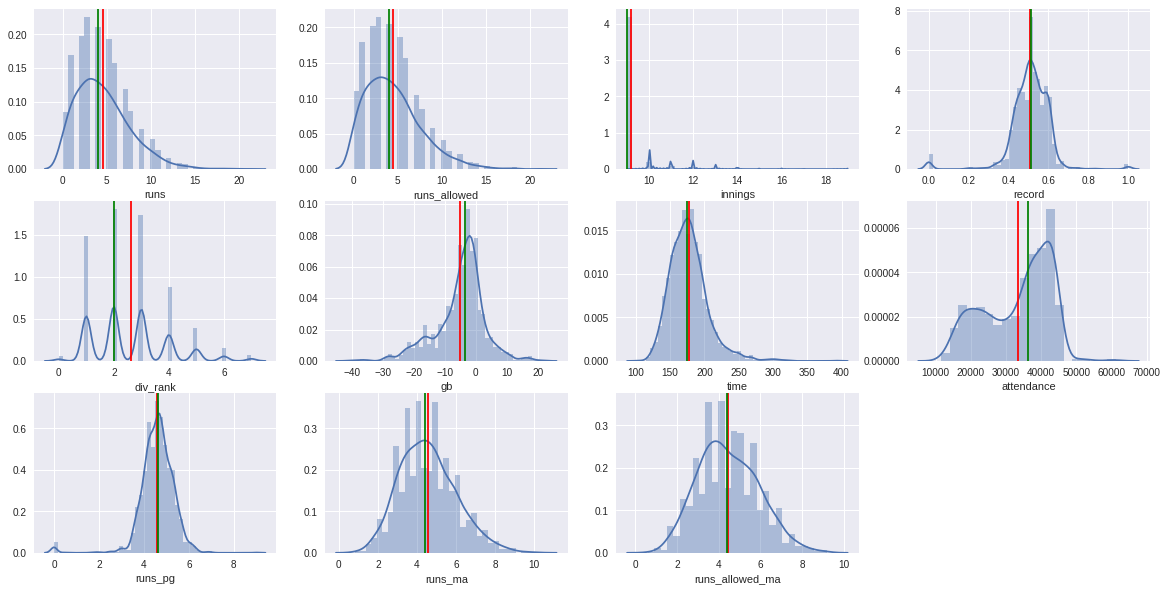

In [679]:
fig = plt.figure(figsize=(20,10))

for i, num_col in enumerate(laa_stats.index):
    fig.add_subplot(3,4,1+i)
    sns.distplot(laa_df[num_col])
    
    mean_value = laa_df[num_col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = laa_df[num_col].median()
    plt.axvline(median_value, c='green')

In [709]:
laa_df[num_cols].corr()

,runs,runs_allowed,innings,record,div_rank,gb,time,attendance,runs_pg,runs_ma,runs_allowed_ma
runs,1.000000,0.027135,-0.020449,0.016786,-0.060930,0.064300,0.204317,-0.020185,0.075712,0.468239,0.035546
runs_allowed,0.027135,1.000000,0.011036,-0.024563,-0.002724,-0.002486,0.405060,-0.064268,0.022476,0.015962,0.053032
innings,-0.020449,0.011036,1.000000,0.008983,0.014327,0.006625,0.610368,-0.002999,0.012040,-0.045565,0.001408
record,0.016786,-0.024563,0.008983,1.000000,-0.457186,0.379358,-0.017123,0.138015,0.587242,0.138903,-0.213464
div_rank,-0.060930,-0.002724,0.014327,-0.457186,1.000000,-0.692525,-0.002634,-0.289017,-0.245432,-0.219825,0.118350
gb,0.064300,-0.002486,0.006625,0.379358,-0.692525,1.000000,-0.003324,0.281737,0.257606,0.203328,-0.090353
time,0.204317,0.405060,0.610368,-0.017123,-0.002634,-0.003324,1.000000,-0.039002,0.054606,0.087928,0.043929
attendance,-0.020185,-0.064268,-0.002999,0.138015,-0.289017,0.281737,-0.039002,1.000000,-0.089241,-0.023716,-0.132940
runs_pg,0.075712,0.022476,0.012040,0.587242,-0.245432,0.257606,0.054606,-0.089241,1.000000,0.299856,0.061917
runs_ma,0.468239,0.015962,-0.045565,0.138903,-0.219825,0.203328,0.087928,-0.023716,0.299856,1.000000,0.054675


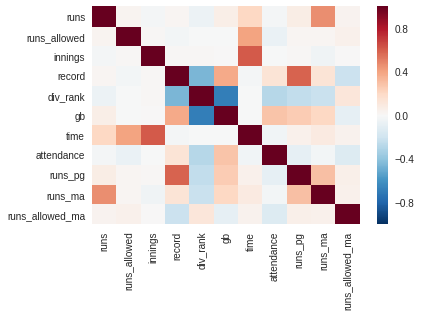

In [710]:
sns.heatmap(laa_df[num_cols].corr())

In [692]:
no_nan_att_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63858 entries, 0 to 63861
Data columns (total 19 columns):
date               63858 non-null datetime64[ns]
team               63858 non-null object
opponent           63858 non-null object
w_or_l             63858 non-null object
runs               63858 non-null int64
runs_allowed       63858 non-null int64
innings            63858 non-null float64
record             63858 non-null float64
div_rank           63858 non-null int64
gb                 63858 non-null float64
time               63858 non-null int64
d_or_n             63858 non-null object
attendance         63858 non-null object
streak             63858 non-null object
double_header      63858 non-null int64
runs_pg            63858 non-null float64
runs_ma            61866 non-null float64
runs_allowed_ma    63858 non-null float64
opening_day        63858 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(6), object(6)
memory usage: 9.7+ MB


In [693]:
laa_cate = no_nan_att_data[(no_nan_att_data['team']=='CAL')|(no_nan_att_data['team']=='ANA')|(no_nan_att_data['team']=='LAA')]

In [ ]:
cate_cols = ['double_header','opening_day', 'L', 'T', 'W', 'march',
       'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'M', 'T', 'W',
       'TH', 'F', 'SA', 'S', 'time_D', 'time_N', 'w1', 'w2', 'w3', 'w4', 'w5',
       'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'w12', 'w13', 'w14', 'w15', 'w16',
       'w17', 'w18', 'w19', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8',
       'l9', 'l10', 'l11', 'l12', 'l13', 'l14', 'l15', 'streak_0', 'rival']

In [700]:
laa_cate['weekday'] = laa_cate['date'].dt.weekday

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [695]:
laa_cate['month'] = laa_cate['date'].dt.month

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [697]:
laa_cate['year'] = laa_cate['date'].dt.year

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


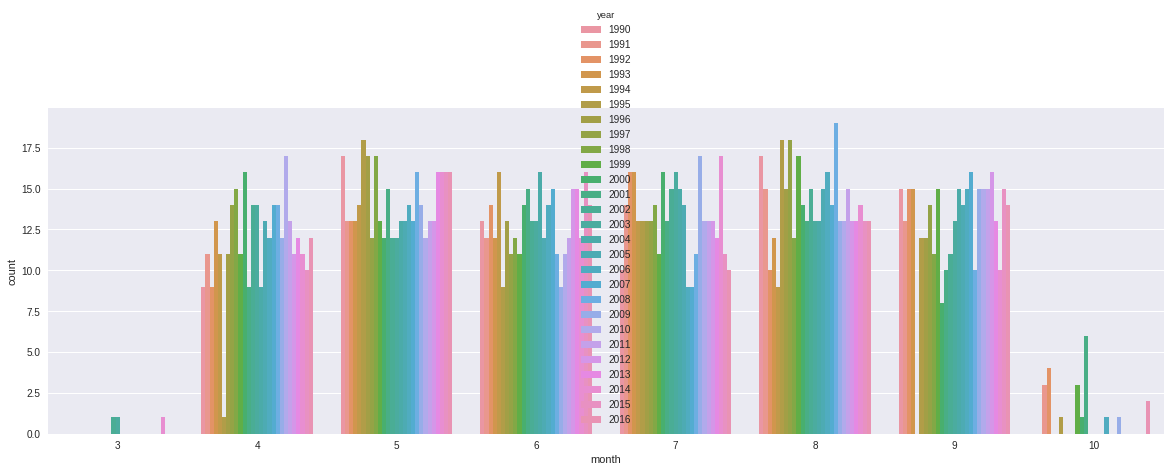

In [699]:
fig = plt.figure(figsize=(20,6))
sns.countplot('month', hue='year' ,data=laa_cate)

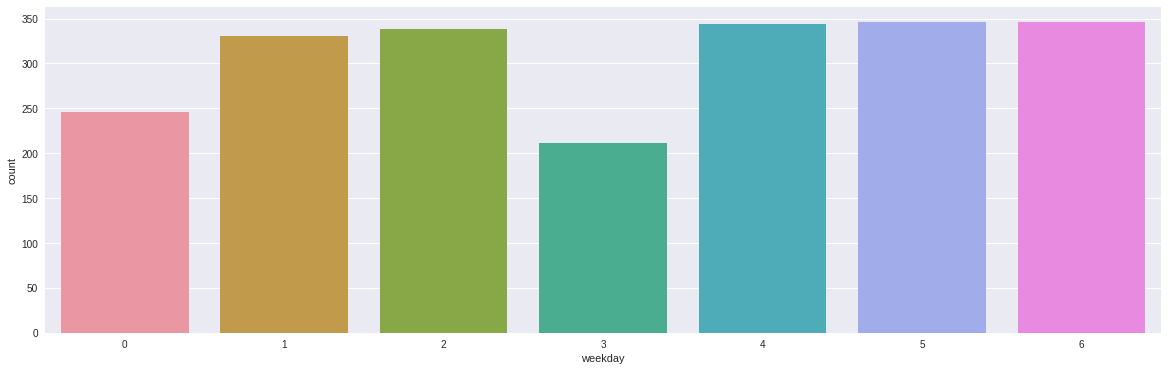

In [701]:
fig = plt.figure(figsize=(20,6))
sns.countplot('weekday' ,data=laa_cate)

In [793]:
previous_date = ['runs', 'runs_allowed', 'innings', 'time', 'result_L', 'result_T', 'result_W']

In [798]:
angel_test = laa_df.copy()

In [836]:
type(angel_test)

pandas.core.frame.DataFrame

In [839]:
ag_group = angel_test.groupby(by='year', axis=0)

In [897]:
shifted_ag=pd.DataFrame()
for key, item in ag_group:
    temp_df = ag_group.get_group(key)
    s_temp_df = temp_df[previous_date].shift(1,axis=0)
    shifted_ag = shifted_ag.append(s_temp_df, ignore_index=False)
    

In [898]:
shifted_ag.fillna(value = 0.0, axis=0, inplace=True)

In [888]:
laa_df.drop(previous_date, axis=1, inplace= True)

In [900]:
laa_df = pd.concat([laa_df, shifted_ag], axis=1)

In [1]:
laa_df[0]

NameError: name 'laa_df' is not defined